# Problem Statement

## Digital Ads data

> The ads24x7 is a Digital Marketing company which has now got seed funding of `$10 Million`.They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to works wonders to segment type of ads based on the variables provided. Use Clustering to segment.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt



In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pylab as pylab
params = {
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [4]:
df = pd.read_excel('C:/GL/DM/Data Mining New Projects/Data Mining New Projects/Clustering Clean Ads_Data.xlsx')

In [5]:
df.head().T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-10,2020-9-1-22,2020-9-3-20,2020-9-4-15
InventoryType,Format1,Format1,Format1,Format1,Format1
Ad - Length,300,300,300,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,75000,75000,75000
Ad Type,Inter222,Inter227,Inter222,Inter228,Inter217
Platform,Video,App,Video,Video,Web
Device Type,Desktop,Mobile,Desktop,Mobile,Desktop
Format,Display,Video,Display,Video,Video
Available_Impressions,1806,1780,2727,2430,1218


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [8]:
np.round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,96674.47,61538.33,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2432043.67,4742887.76,1.00,33672.25,483771.00,2527711.75,27592861.00
Matched_Queries,23066.0,1295099.14,2512969.86,1.00,18282.50,258087.50,1180700.00,14702025.00
Impressions,23066.0,1241519.52,2429399.96,1.00,7990.50,225290.00,1112428.50,14194774.00
Clicks,23066.0,10678.52,17353.41,1.00,710.00,4425.00,12793.75,143049.00
Spend,23066.0,2706.63,4067.93,0.00,85.18,1425.12,3121.40,26931.87
Fee,23066.0,0.34,0.03,0.21,0.33,0.35,0.35,0.35
Revenue,23066.0,1924.25,3105.24,0.00,55.37,926.34,2091.34,21276.18


In [9]:
df.duplicated().sum()

0

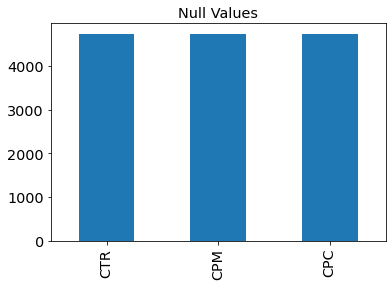

In [10]:
df.isnull().sum()[df.isnull().sum()>0].plot(kind='bar')
plt.title('Null Values');

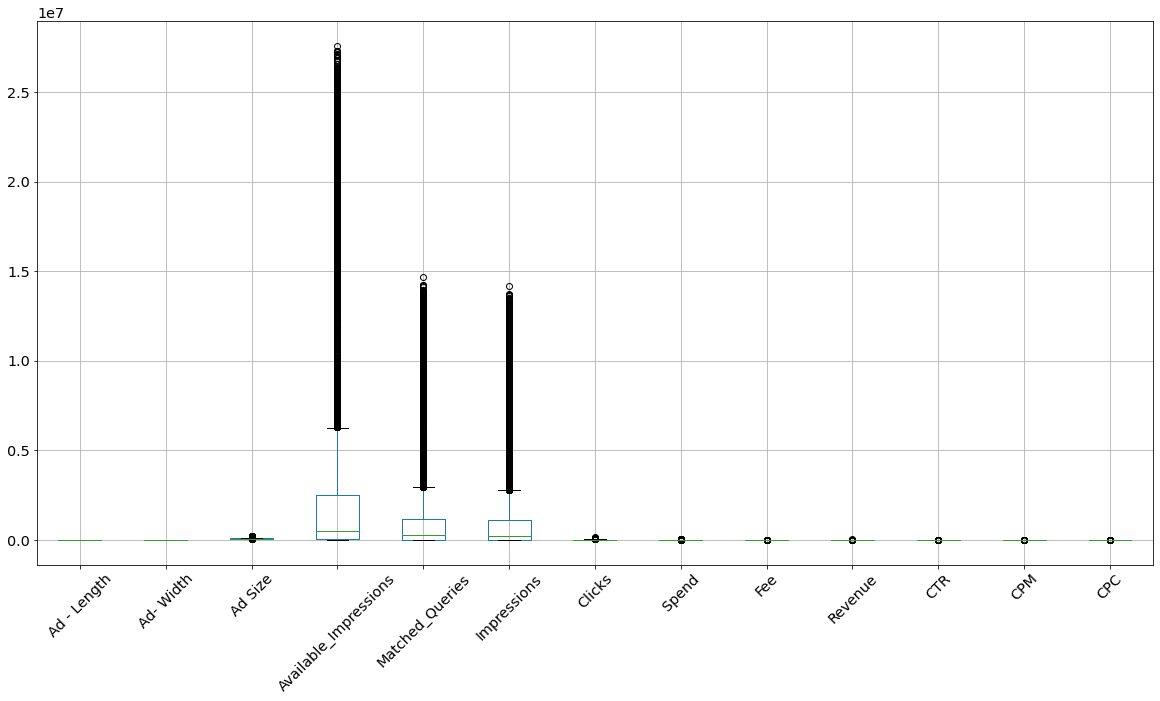

In [11]:
df.boxplot(figsize=(20,10),rot=45)
plt.show()

In [12]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

## missing values treatment

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100


In [13]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [14]:
def calculate_ctr(x):
    clicks = df.Clicks
    impressions=df.Impressions
    ctr = (clicks/impressions)*100
    return ctr
    

In [15]:
def calculate_cpc(x):
    spend=df.Spend
    clicks = df.Clicks
    cpc = (spend/clicks)
    return cpc
    

In [16]:
def calculate_cpm(x):
    spend=df.Spend
    impressions=df.Impressions
    cpm = (spend/impressions)*1000
    return cpm
    

In [17]:
df['CTR'] = df[['CTR']].apply(lambda x: calculate_ctr(x))
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))

In [18]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [19]:
df_num= df.select_dtypes(include=['float64','int64'])

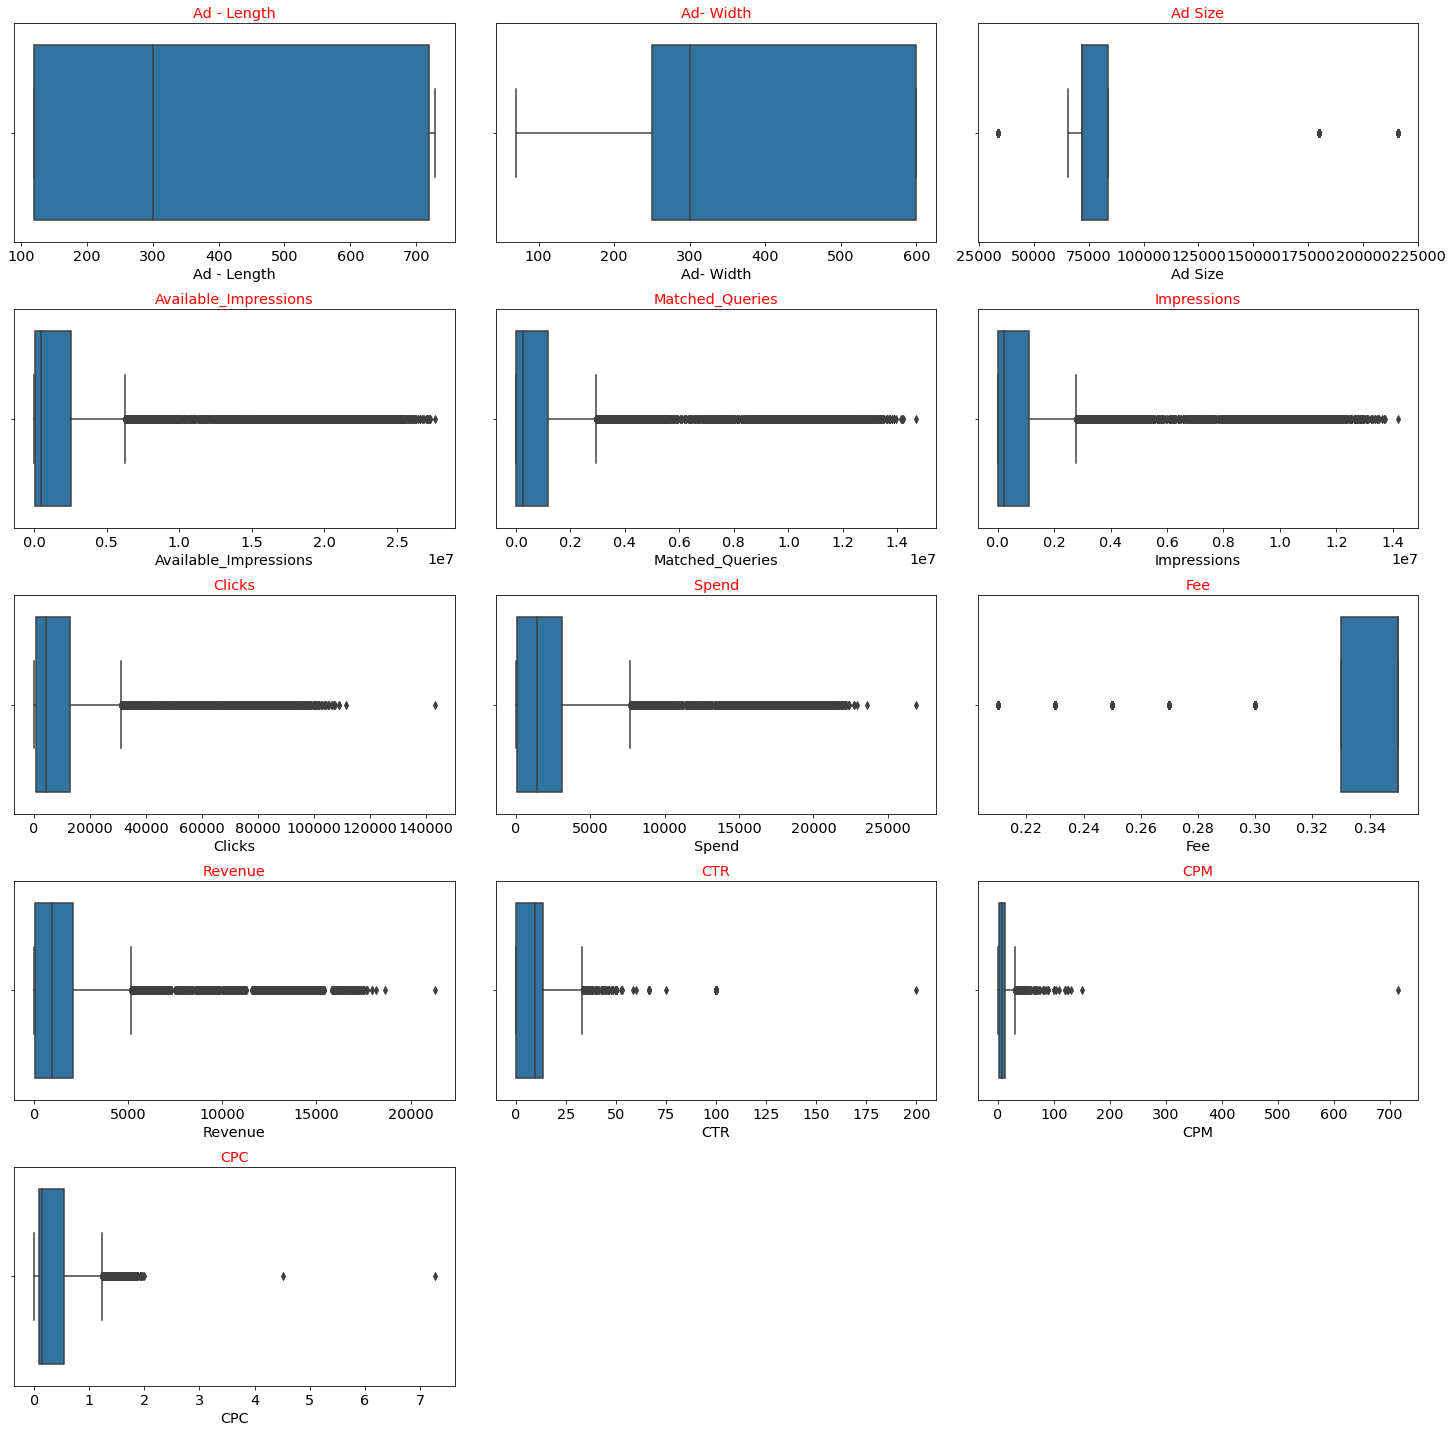

In [20]:
data_plot=df_num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [21]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)#check this function

In [22]:
def print_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [23]:
for i in df_num.columns:
    print(i,'=',print_outlier(df_num[i]))

Ad - Length = ('5%=', 120.0, 'Q1=', 120.0, 'Q3=', 720.0, 'IQR=', 600.0, 'LL=', -780.0, 'UL=', 1620.0, '95%', 728.0, 'max=', 728, 'min=', 120)
Ad- Width = ('5%=', 70.0, 'Q1=', 250.0, 'Q3=', 600.0, 'IQR=', 350.0, 'LL=', -275.0, 'UL=', 1125.0, '95%', 600.0, 'max=', 600, 'min=', 70)
Ad Size = ('5%=', 33600.0, 'Q1=', 72000.0, 'Q3=', 84000.0, 'IQR=', 12000.0, 'LL=', 54000.0, 'UL=', 102000.0, '95%', 216000.0, 'max=', 216000, 'min=', 33600)
Available_Impressions = ('5%=', 486.25, 'Q1=', 33672.25, 'Q3=', 2527711.75, 'IQR=', 2494039.5, 'LL=', -3707387.0, 'UL=', 6268771.0, '95%', 14363912.25, 'max=', 27592861, 'min=', 1)
Matched_Queries = ('5%=', 160.25, 'Q1=', 18282.5, 'Q3=', 1180700.0, 'IQR=', 1162417.5, 'LL=', -1725343.75, 'UL=', 2924326.25, '95%', 7803449.0, 'max=', 14702025, 'min=', 1)
Impressions = ('5%=', 149.25, 'Q1=', 7990.5, 'Q3=', 1112428.5, 'IQR=', 1104438.0, 'LL=', -1648666.5, 'UL=', 2769085.5, '95%', 7473380.25, 'max=', 14194774, 'min=', 1)
Clicks = ('5%=', 13.0, 'Q1=', 710.0, 'Q3='

In [24]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

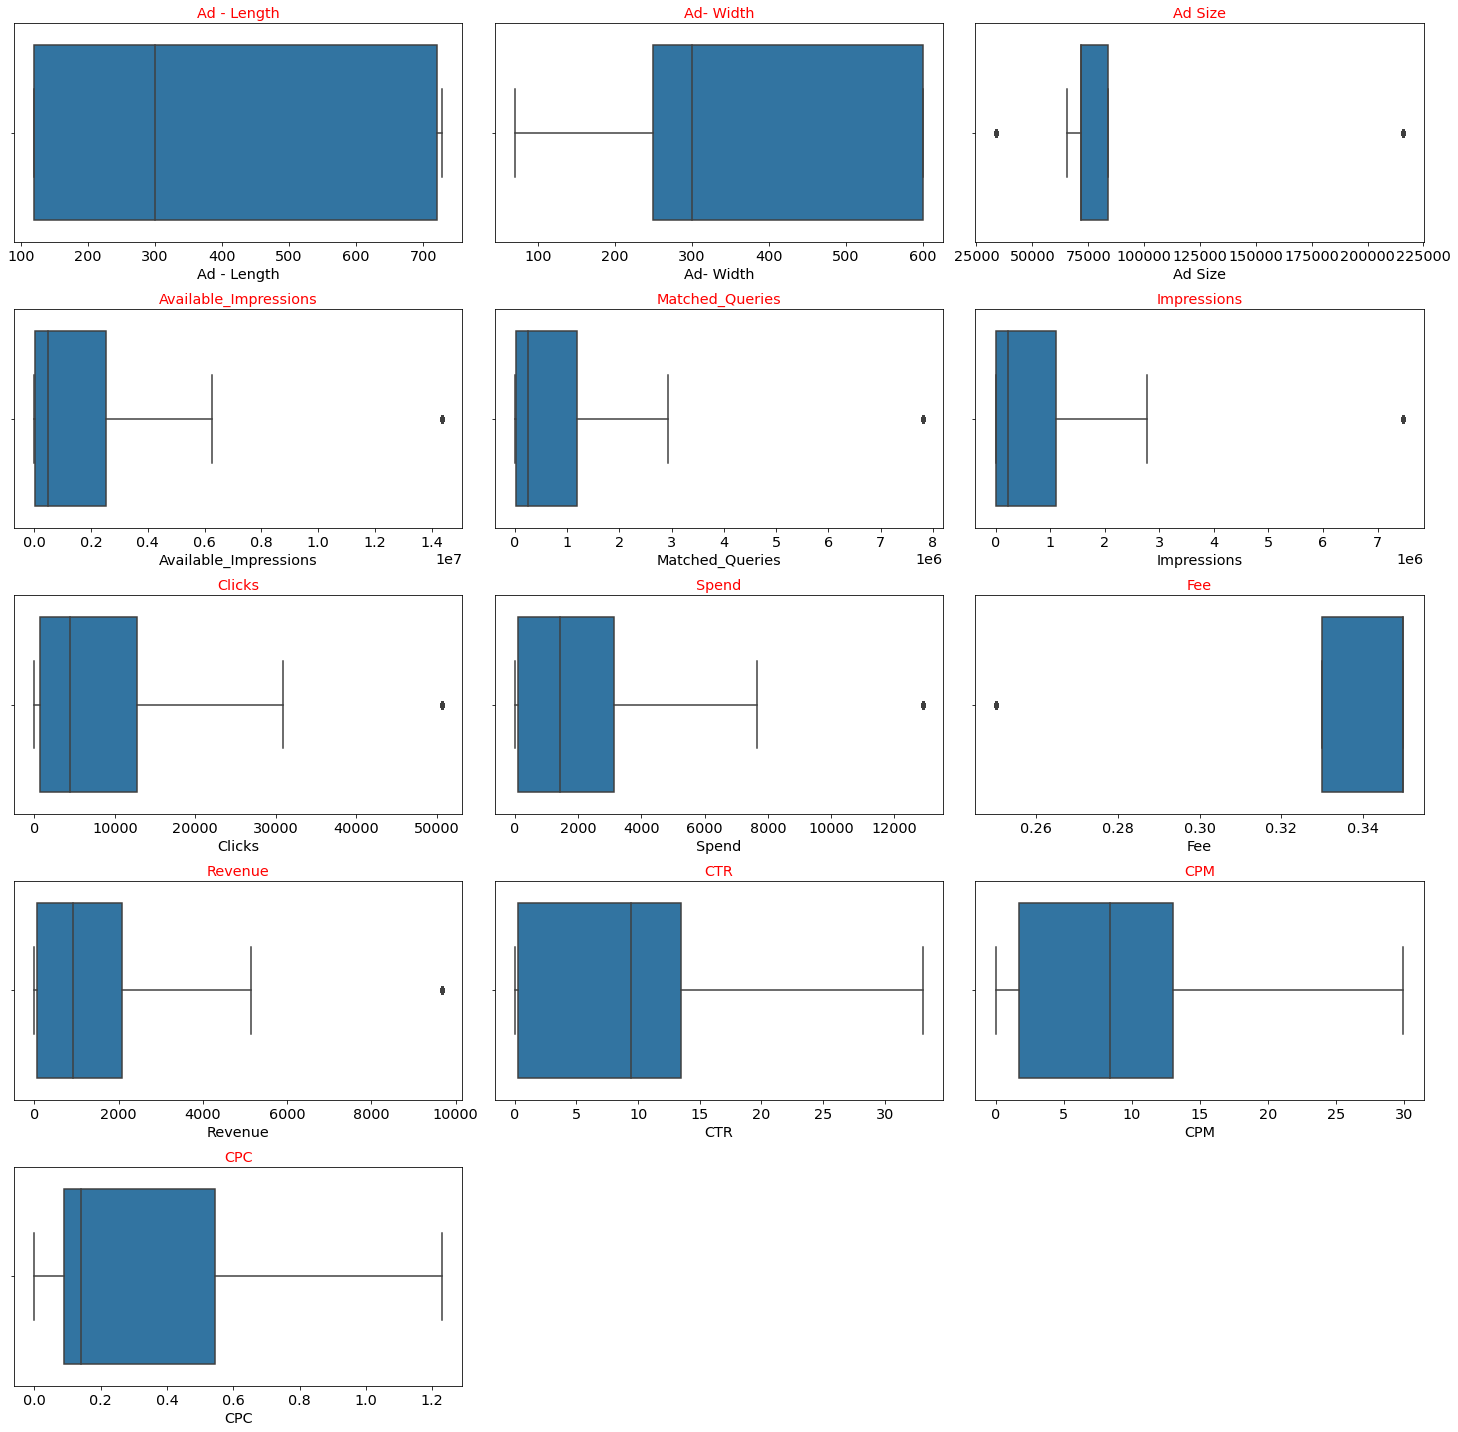

In [25]:
data_plot=df_num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = StandardScaler()

In [28]:
scaled_df = pd.DataFrame(X.fit_transform(df_num),columns=df_num.columns)

In [29]:
scaled_df.head().T

,0,1,2,3,4
Ad - Length,-0.364496,-0.364496,-0.364496,-0.364496,-0.364496
Ad- Width,-0.432797,-0.432797,-0.432797,-0.432797,-0.432797
Ad Size,-0.359227,-0.359227,-0.359227,-0.359227,-0.359227
Available_Impressions,-0.569484,-0.569490,-0.569269,-0.569339,-0.569622
Matched_Queries,-0.567061,-0.567076,-0.567049,-0.566994,-0.567093
Impressions,-0.563943,-0.563958,-0.563931,-0.563875,-0.563975
Clicks,-0.719779,-0.719779,-0.719779,-0.719779,-0.719779
Spend,-0.722776,-0.722776,-0.722776,-0.722776,-0.722776
Fee,0.487214,0.487214,0.487214,0.487214,0.487214
Revenue,-0.676118,-0.676118,-0.676118,-0.676118,-0.676118


### Hierarchical Clustering


In [30]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster


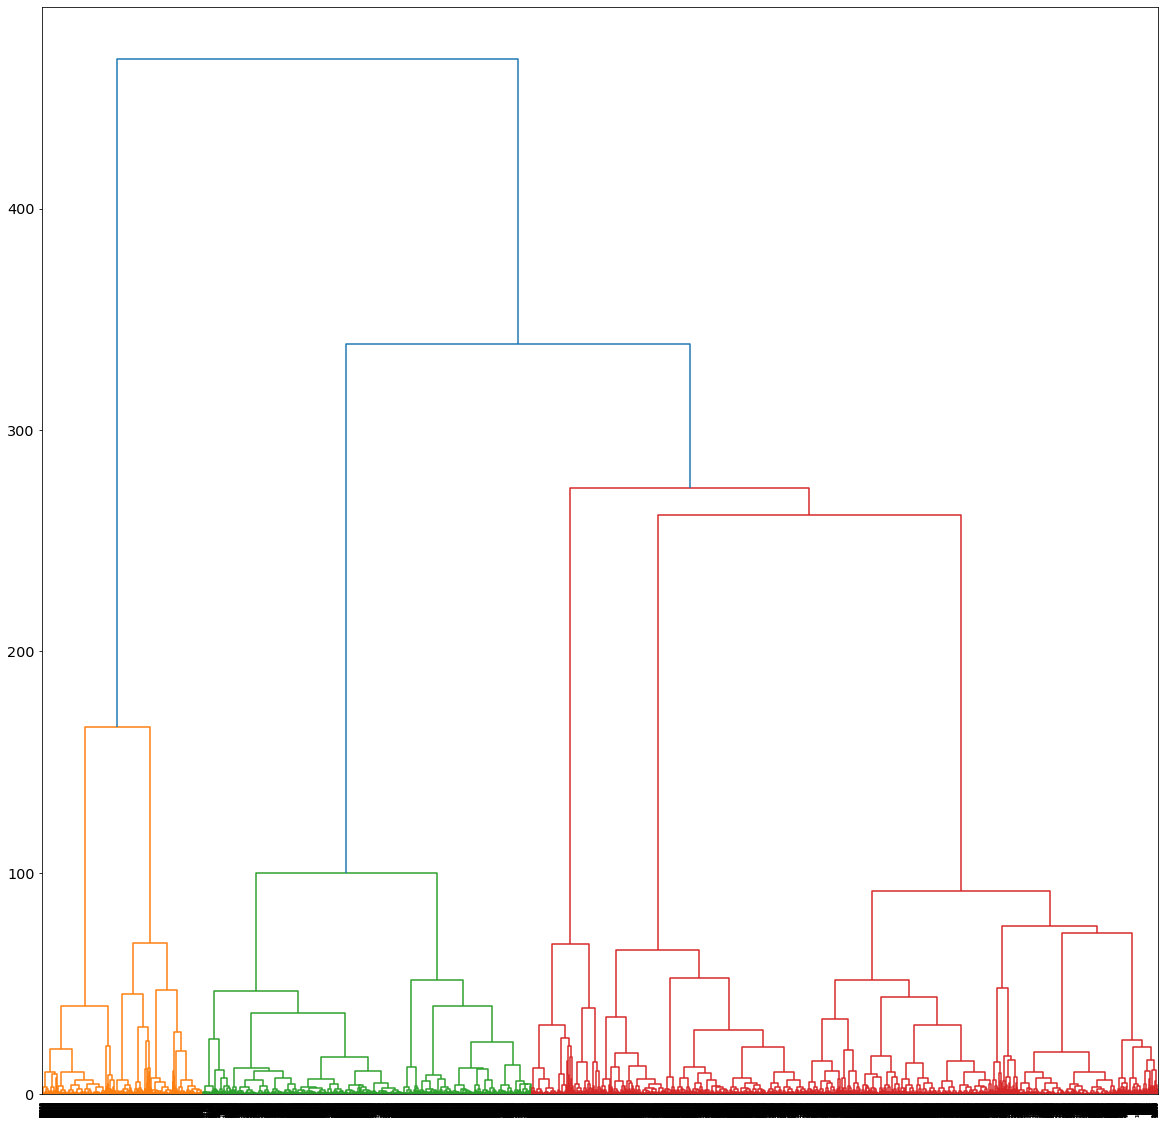

In [31]:
x_full = scaled_df.values
plt.figure(figsize=(20, 20))
Z = sch.dendrogram(sch.linkage(x_full, method = "ward", metric='euclidean'))
plt.show()


### KMeans

In [32]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
wss =[] 
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)


Text(0, 0.5, 'WSS')

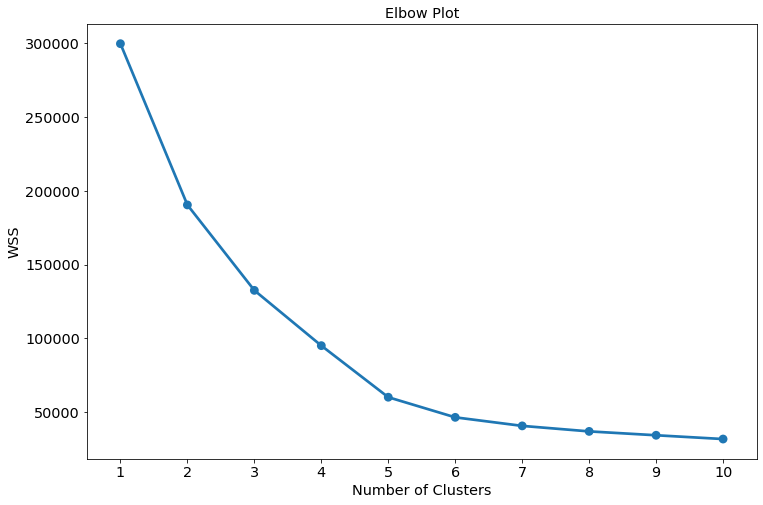

In [34]:
plt.figure(figsize=(12,8))
sns.pointplot(a, wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

In [35]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 y=clusterer.fit_predict(scaled_df)
 s =silhouette_score(scaled_df, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))


The Average Silhouette Score for 2 clusters is 0.47368
The Average Silhouette Score for 3 clusters is 0.39136
The Average Silhouette Score for 4 clusters is 0.45212
The Average Silhouette Score for 5 clusters is 0.55659
The Average Silhouette Score for 6 clusters is 0.57526
The Average Silhouette Score for 7 clusters is 0.53537
The Average Silhouette Score for 8 clusters is 0.46291
The Average Silhouette Score for 9 clusters is 0.45851
The Average Silhouette Score for 10 clusters is 0.46434


Text(0.5, 0, 'Number of clusters')

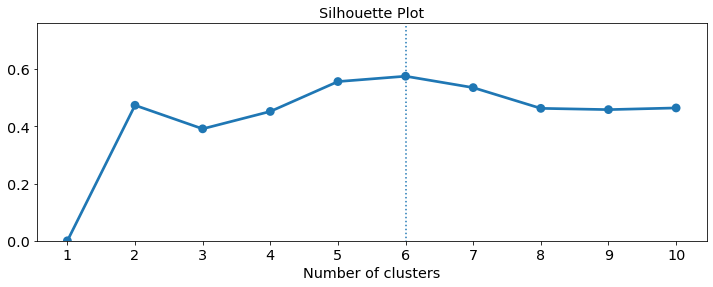

In [36]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.75,linestyles='dotted')
ax.set(ylim=(0, 0.76))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')

In [37]:
clusterer = KMeans(n_clusters =6, init = 'k-means++', random_state = 1)

clusterer.fit_predict(scaled_df)

labels = clusterer.labels_


In [38]:
df['KMEANS_LABELS'] = labels

In [39]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMEANS_LABELS
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,4
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,4
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,4
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,4
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,4


# Cluster Profiling

In [40]:
df.KMEANS_LABELS.value_counts(1)*100
# label has majority data

4    30.321686
0    29.662707
2    19.569930
1     7.612937
5     6.620134
3     6.212607
Name: KMEANS_LABELS, dtype: float64

In [41]:
df.KMEANS_LABELS.value_counts()

4    6994
0    6842
2    4514
1    1756
5    1527
3    1433
Name: KMEANS_LABELS, dtype: int64

In [42]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMEANS_LABELS
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,8.409941,8.396849,0.336678,2.197780
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,9.262048,9.057760,0.341253,1.759108
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.010874,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.265107,1.749084,0.089736,0.000000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,9.391248,8.371566,0.139347,2.000000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,13.470571,13.042018,0.546242,4.000000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,200.000000,715.000000,7.264000,5.000000


In [43]:
clust_profile=df
clust_profile=clust_profile.groupby('KMEANS_LABELS').mean()
clust_profile['freq']=df.KMEANS_LABELS.value_counts().sort_index()
np.round(clust_profile,2).T

KMEANS_LABELS,0,1,2,3,4,5
Ad - Length,149.55,316.28,695.17,142.18,418.07,680.94
Ad- Width,558.21,254.54,316.80,571.18,157.14,117.92
Ad Size,75690.15,78364.78,213586.18,75625.96,56445.35,70159.76
Available_Impressions,46582.25,6583616.27,279059.43,843405.75,2070385.26,17858169.00
Matched_Queries,28661.60,3680737.02,147665.19,591156.63,1020575.04,9536142.81
Impressions,21257.39,3600777.01,126758.60,498760.11,980987.72,9181756.42
Clicks,2947.20,8548.28,13904.89,68157.27,3451.11,17394.94
Spend,318.92,4867.49,1224.16,7234.73,1763.33,15373.73
Fee,0.35,0.32,0.35,0.29,0.35,0.24
Revenue,208.48,3326.64,797.23,5205.55,1157.98,11761.38


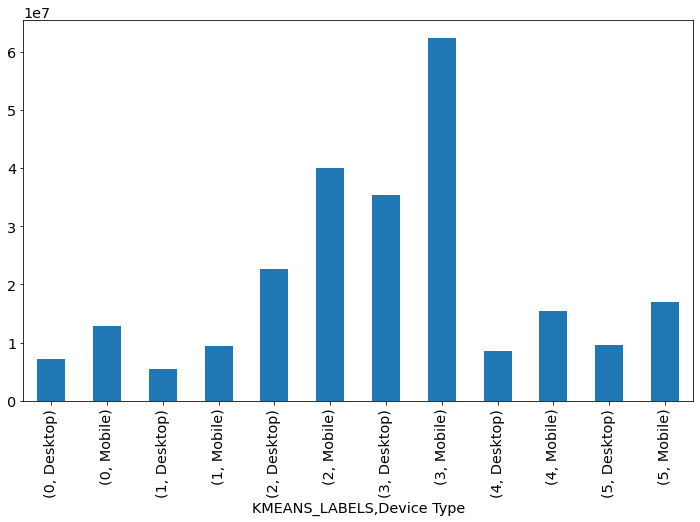

In [44]:
df.groupby(['KMEANS_LABELS','Device Type']).sum()['Clicks'].plot(kind='bar',figsize=(12,7));

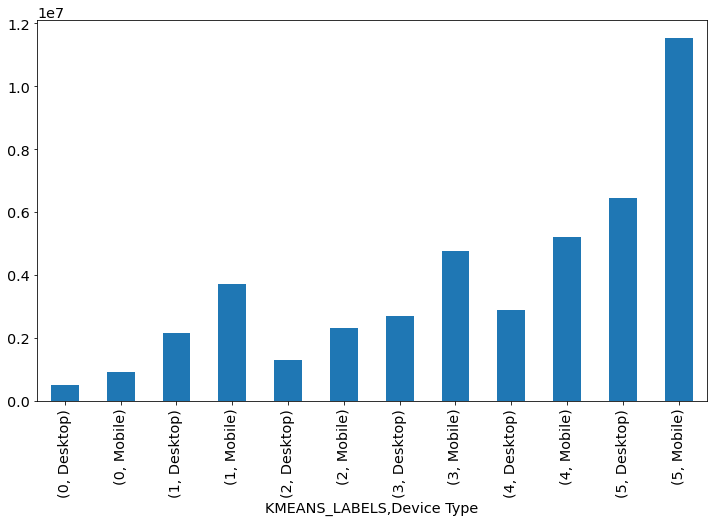

In [45]:
df.groupby(['KMEANS_LABELS','Device Type']).sum()['Revenue'].plot(kind='bar',figsize=(12,7));

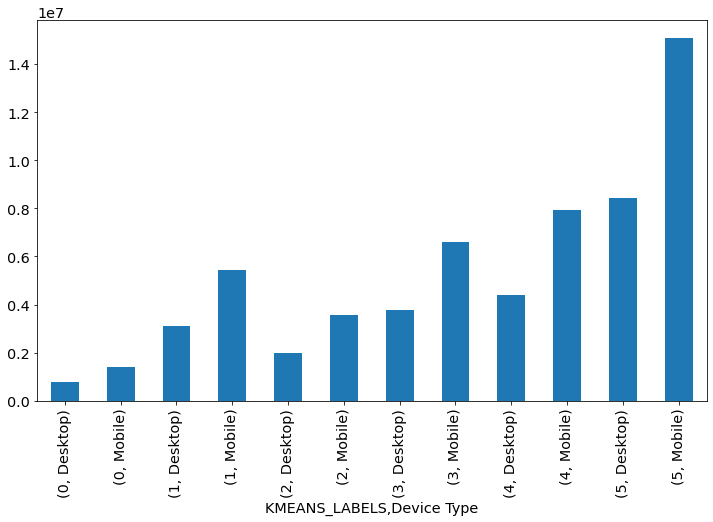

In [46]:
df.groupby(['KMEANS_LABELS','Device Type']).sum()['Spend'].plot(kind='bar',figsize=(12,7));

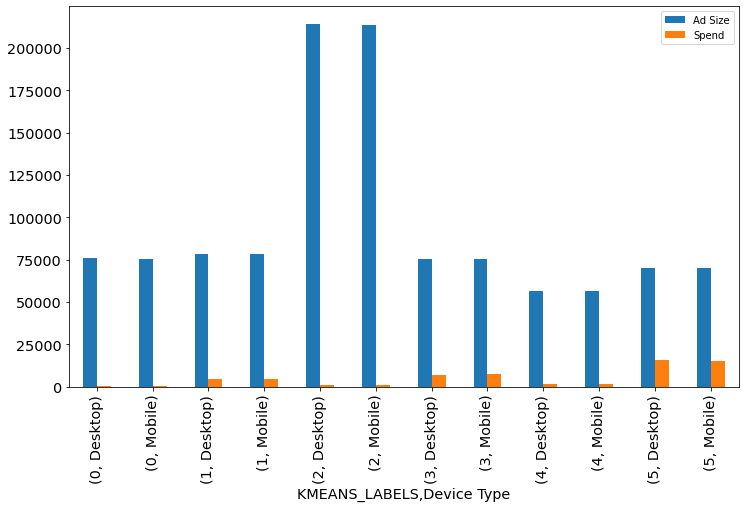

In [47]:
df.groupby(['KMEANS_LABELS','Device Type']).mean()[['Ad Size','Spend']].plot(kind='bar',figsize=(12,7));

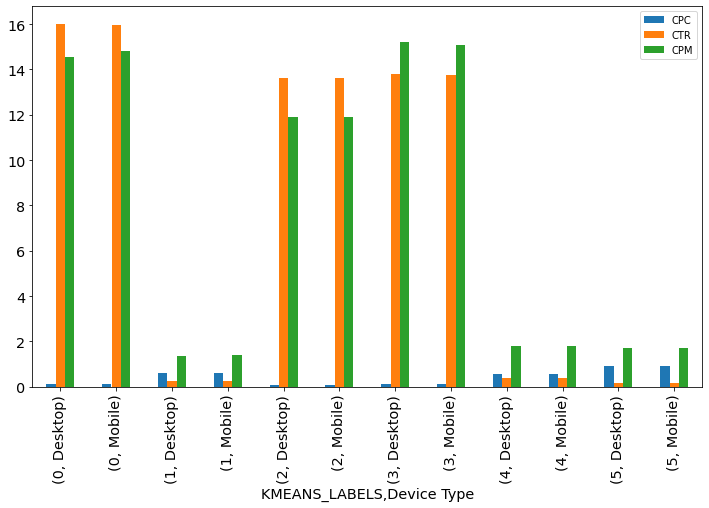

In [48]:
df.groupby(['KMEANS_LABELS','Device Type']).mean()[['CPC','CTR','CPM']].plot(kind='bar',figsize=(12,7));

In [49]:
#df.to_csv('cc.csv')

In [50]:
silhouette_samples(scaled_df,labels).min()

-0.08027416318517626